## Initial Setup

In [1]:
#Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
#Reading csv and creating pandas dataframe

coaches = pd.read_csv("C:\\Users\\Andrew\\Documents\\Syracuse University\\2023 Documents\\IST 718 Big Data Analytics\\Labs\\Lab 1\\Data Sets\\Coaches9.csv")

coaches_df = pd.DataFrame(coaches)

#Validating dataframe looks good
coaches_df

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
...,...,...,...,...,...,...,...,...,...
124,West Virginia,Big 12,Dana Holgorsen,"$3,605,000","$3,617,500","$1,000,000","$90,000",$0,"$7,150,000"
125,Western Kentucky,C-USA,Mike Sanford Jr.,"$800,000","$805,850","$400,000",$0,$0,"$1,200,000"
126,Western Michigan,MAC,Tim Lester,"$800,000","$800,000","$346,500","$39,250",$0,"$800,000"
127,Wisconsin,Big Ten,Paul Chryst,"$3,750,000","$3,750,000",--,"$290,000",$0,"$6,000,000"


## Scrubbing/Cleaning 

In [3]:
#Removing commas and dollar signs from monetary columns 

coaches_df['SchoolPay'] = coaches_df['SchoolPay'].str.replace(',','').str.replace('$','')
coaches_df['TotalPay'] = coaches_df['TotalPay'].str.replace(',','').str.replace('$','')
coaches_df['Bonus'] = coaches_df['Bonus'].str.replace(',','').str.replace('$','')
coaches_df['BonusPaid'] = coaches_df['BonusPaid'].str.replace(',','').str.replace('$','')
coaches_df['AssistantPay'] = coaches_df['AssistantPay'].str.replace(',','').str.replace('$','')
coaches_df['Buyout'] = coaches_df['Buyout'].str.replace(',','').str.replace('$','')

#coaches_df

In [4]:
#Replacing '--' values with NaN in df

coaches_df['SchoolPay'] = coaches_df['SchoolPay'].replace('--', np.NaN)
coaches_df['TotalPay'] = coaches_df['TotalPay'].replace('--', np.NaN)
coaches_df['Bonus'] = coaches_df['Bonus'].replace('--', np.NaN)
coaches_df['BonusPaid'] = coaches_df['BonusPaid'].replace('--', np.NaN)
coaches_df['AssistantPay'] = coaches_df['AssistantPay'].replace('--', np.NaN)
coaches_df['Buyout'] = coaches_df['Buyout'].replace('--', np.NaN)

#coaches_df

In [5]:
#Removing four rows where there are NaN values in each column.  
#The four schools, in the order listed below, are Baylor, Brigham Young, Rice, and Southern Methodist.

coaches_df = coaches_df.drop([12, 16, 91, 99])

#Resetting the index of the df
coaches_df = coaches_df.reset_index(drop=True)

In [6]:
#Checking for null values in df

print(f"There are {coaches_df['SchoolPay'].isna().sum()} NaN values in the SchoolPay column")
print(f"There are {coaches_df['TotalPay'].isna().sum()} NaN values in the TotalPay column")
print(f"There are {coaches_df['Bonus'].isna().sum()} NaN values in the Bonus column")
print(f"There are {coaches_df['BonusPaid'].isna().sum()} NaN values in the BonusPaid column")
print(f"There are {coaches_df['AssistantPay'].isna().sum()} NaN values in the AssistantPay column")
print(f"There are {coaches_df['Buyout'].isna().sum()} NaN values in the Buyout column")

There are 0 NaN values in the SchoolPay column
There are 0 NaN values in the TotalPay column
There are 17 NaN values in the Bonus column
There are 36 NaN values in the BonusPaid column
There are 0 NaN values in the AssistantPay column
There are 17 NaN values in the Buyout column


In [7]:
#Converting monetary columns from strings to numeric

coaches_df['SchoolPay'] = coaches_df['SchoolPay'].apply(pd.to_numeric)
coaches_df['TotalPay'] = coaches_df['TotalPay'].apply(pd.to_numeric)
coaches_df['Bonus'] = coaches_df['Bonus'].apply(pd.to_numeric)
coaches_df['BonusPaid'] = coaches_df['BonusPaid'].apply(pd.to_numeric)
coaches_df['AssistantPay'] = coaches_df['AssistantPay'].apply(pd.to_numeric)
coaches_df['Buyout'] = coaches_df['Buyout'].apply(pd.to_numeric)

#Double checking individual values to make sure they are, in fact, numeric
print(f"SchoolPay: {type(coaches_df['SchoolPay'].iloc[1])}")
print(f"TotalPay: {type(coaches_df['TotalPay'].iloc[1])}")
print(f"Bonus: {type(coaches_df['Bonus'].iloc[1])}")
print(f"BonusPaid: {type(coaches_df['BonusPaid'].iloc[1])}")
print(f"AssistantPay: {type(coaches_df['AssistantPay'].iloc[1])}")
print(f"Buyout: {type(coaches_df['Buyout'].iloc[1])}")

SchoolPay: <class 'numpy.int64'>
TotalPay: <class 'numpy.int64'>
Bonus: <class 'numpy.float64'>
BonusPaid: <class 'numpy.float64'>
AssistantPay: <class 'numpy.int64'>
Buyout: <class 'numpy.float64'>


In [8]:
#Checking to make sure no spelling errors in each unique string column

#coaches_df['School'].unique()
#coaches_df['Conference'].unique()
#coaches_df['Coach'].unique()

#No spelling discrepancies detected

## Adding Additional Data Sets

#### Stadium Size Data Set 

In [9]:
#Reading in stadium size csv

stadium_size = pd.read_csv("C:\\Users\\Andrew\\Documents\\Syracuse University\\2023 Documents\\IST 718 Big Data Analytics\\Labs\\Lab 1\\Data Sets\\718_Lab_1_Stadium_Sizes.csv")

stadium_size_df = pd.DataFrame(stadium_size)

#Checking to make sure data frame imported correctly
#stadium_size_df

In [10]:
#Adding stadium size column to coaches_df data frame

coaches_df['StadiumSize'] = stadium_size_df['StadiumSize']

#Double checking that the column imported correctly
#coaches_df

In [11]:
#Making sure Stadium Size column is numeric

print(f"Stadium Size: {type(coaches_df['StadiumSize'].iloc[1])}")

Stadium Size: <class 'numpy.int64'>


#### GSR and FGR Data Set 

In [12]:
#Reading in GSR and FGR data set

gsr_and_fgr = pd.read_csv("C:\\Users\\Andrew\\Documents\\Syracuse University\\2023 Documents\\IST 718 Big Data Analytics\\Labs\\Lab 1\\Data Sets\\718_Lab_1_GSR_FGR.csv")

gsr_and_fgr_df = pd.DataFrame(gsr_and_fgr)

#Checking to make sure data frame imported correctly
#gsr_and_fgr_df

In [13]:
#Adding the GSR and FGR columns to the coaches_df data set

coaches_df['GSR'] = gsr_and_fgr_df['GSR']
coaches_df['FGR'] = gsr_and_fgr_df['FGR']

#Making sure column imported correctly
#coaches_df

In [14]:
#Making sure both GSR and FGR columns are numeric

print(f"GSR: {type(coaches_df['GSR'].iloc[1])}")
print(f"FGR: {type(coaches_df['FGR'].iloc[1])}")

GSR: <class 'numpy.int64'>
FGR: <class 'numpy.float64'>


#### Revenue Data Set 

In [15]:
#Reading in revenue data set

revenue = pd.read_csv("C:\\Users\\Andrew\\Documents\\Syracuse University\\2023 Documents\\IST 718 Big Data Analytics\\Labs\\Lab 1\\Data Sets\\718_Lab_1_Revenue.csv")

revenue_df = pd.DataFrame(revenue)

#Checking to make sure data frame imported correctly
#revenue_df

In [16]:
#Adding revenue column to coaches_df data set

coaches_df['Revenue'] = revenue_df['Revenue']

#Making sure column imported correctly
#coaches_df

In [17]:
#Making sure revenue column is numeric

print(f"Revenue: {type(coaches_df['Revenue'].iloc[1])}")

Revenue: <class 'numpy.float64'>


#### Wins/Losses Data Set 

In [18]:
#Reading in wins/losses data set

wins_losses = pd.read_csv("C:\\Users\\Andrew\\Documents\\Syracuse University\\2023 Documents\\IST 718 Big Data Analytics\\Labs\\Lab 1\\Data Sets\\718_Lab_1_Wins_Losses.csv")

wins_losses_df = pd.DataFrame(wins_losses)

#Checking to make sure data frame imported correctly
#wins_losses_df

In [19]:
#Adding Wins and Losses columns to coaches_df data set

coaches_df['Wins'] = wins_losses_df['Wins']
coaches_df['Losses'] = wins_losses_df['Losses']

#Making sure column imported correctly
#coaches_df

In [20]:
#Making sure both Wins and Losses columns are numeric

print(f"Wins: {type(coaches_df['Wins'].iloc[0])}")
print(f"Losses: {type(coaches_df['Losses'].iloc[0])}")

Wins: <class 'numpy.int64'>
Losses: <class 'numpy.int64'>


#### Coordinates Data Set

In [21]:
#Reading in Coordinates data set

coordinates = pd.read_csv("C:\\Users\\Andrew\\Documents\\Syracuse University\\2023 Documents\\IST 718 Big Data Analytics\\Labs\\Lab 1\\Data Sets\\718_Lab_1_Coordinates.csv")

coordinates_df = pd.DataFrame(coordinates)

#Making sure data frame imported correctly
#coordinates_df

In [22]:
#Adding coordinates columns to the coaches_df data set

coaches_df['Latitude'] = coordinates_df['Latitude']
coaches_df['Longitude'] = coordinates_df['Longitude']

#Making sure column imported correctly
#coaches_df

In [23]:
#Making sure both Latitude and Longitude columns are numeric

print(f"Latitude: {type(coaches_df['Latitude'].iloc[0])}")
print(f"Longitude: {type(coaches_df['Longitude'].iloc[0])}")

Latitude: <class 'numpy.float64'>
Longitude: <class 'numpy.float64'>


In [24]:
coaches_df

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,StadiumSize,GSR,FGR,Revenue,Wins,Losses,Latitude,Longitude
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000.0,NaN,0,NaN,52237,93,NaN,NaN,424,338,38.996907,-104.843688
1,Akron,MAC,Terry Bowden,411000,412500,225000.0,50000.0,0,688500.0,30000,74,76.0,12354872.0,528,583,41.072570,-81.508384
2,Alabama,SEC,Nick Saban,8307000,8307000,1100000.0,500000.0,0,33600000.0,101821,89,66.0,140831439.0,953,335,33.207490,-87.550392
3,Alabama at Birmingham,C-USA,Bill Clark,900000,900000,950000.0,165471.0,0,3847500.0,71594,80,44.0,28840003.0,168,179,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500,712500,295000.0,145000.0,0,2160417.0,24150,81,57.0,194500000.0,655,349,36.211515,-81.685506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,West Virginia,Big 12,Dana Holgorsen,3605000,3617500,1000000.0,90000.0,0,7150000.0,60000,83,53.0,34050353.0,772,522,39.652220,-79.955175
121,Western Kentucky,C-USA,Mike Sanford Jr.,800000,805850,400000.0,0.0,0,1200000.0,22113,75,65.0,13764592.0,607,421,36.984877,-86.459014
122,Western Michigan,MAC,Tim Lester,800000,800000,346500.0,39250.0,0,800000.0,30200,74,40.0,12863908.0,593,473,42.285755,-85.601004
123,Wisconsin,Big Ten,Paul Chryst,3750000,3750000,NaN,290000.0,0,6000000.0,80321,88,79.0,88713614.0,735,512,43.069938,-89.412746


## Summary Data

In [25]:
#Seeing how many unique schools are in the data set

print(f"There are {len(coaches_df['School'].unique())} unique schools in the coaches data set")

There are 125 unique schools in the coaches data set


In [26]:
#Seeing how many unique conferences there are in the data set

print(f"There are {len(coaches_df['Conference'].unique())} unique conferences in the coaches data set, they are: \
{list(coaches_df['Conference'].unique())}")

There are 11 unique conferences in the coaches data set, they are: ['Mt. West', 'MAC', 'SEC', 'C-USA', 'Sun Belt', 'Pac-12', 'Ind.', 'ACC', 'AAC', 'Big Ten', 'Big 12']


In [27]:
print(f"There are {len(coaches_df['Coach'].unique())} unique coaches in the coaches data set")

There are 125 unique coaches in the coaches data set


In [28]:
#Summary stats for the School Pay column

coaches_df['SchoolPay'].describe()

count    1.250000e+02
mean     2.410301e+06
std      1.881377e+06
min      3.900000e+05
25%      8.015040e+05
50%      1.831580e+06
75%      3.605000e+06
max      8.307000e+06
Name: SchoolPay, dtype: float64

In [29]:
#Summary stats for the Total Pay column

coaches_df['TotalPay'].describe()

count    1.250000e+02
mean     2.417061e+06
std      1.885752e+06
min      3.900000e+05
25%      8.058500e+05
50%      1.900008e+06
75%      3.617500e+06
max      8.307000e+06
Name: TotalPay, dtype: float64

In [30]:
#Summary stats for the Bonus column

coaches_df['Bonus'].describe()

count    1.080000e+02
mean     8.690469e+05
std      6.339712e+05
min      5.000000e+04
25%      3.915000e+05
50%      7.700000e+05
75%      1.150000e+06
max      3.100000e+06
Name: Bonus, dtype: float64

In [31]:
#Summary stats for the Bonus Paid column

coaches_df['BonusPaid'].describe()

count    8.900000e+01
mean     1.495296e+05
std      2.373974e+05
min      0.000000e+00
25%      2.000000e+04
50%      6.500000e+04
75%      1.800000e+05
max      1.350000e+06
Name: BonusPaid, dtype: float64

In [32]:
#Summary stats for the Assistant Pay column

coaches_df['AssistantPay'].describe()

count    125.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: AssistantPay, dtype: float64

In [33]:
#Summary stats for the Buyout column

coaches_df['Buyout'].describe()

count    1.080000e+02
mean     8.136523e+06
std      1.041392e+07
min      0.000000e+00
25%      1.200000e+06
50%      4.018758e+06
75%      1.070750e+07
max      6.812500e+07
Name: Buyout, dtype: float64

In [34]:
#Summary stats for the Stadium Size column

coaches_df['StadiumSize'].describe()

count       125.000000
mean      52518.928000
std       22953.985867
min       15000.000000
25%       30964.000000
50%       50000.000000
75%       65500.000000
max      107601.000000
Name: StadiumSize, dtype: float64

In [35]:
#Summary stats for the GSR column

coaches_df['GSR'].describe()

count    125.000000
mean      81.448000
std        8.611186
min       54.000000
25%       75.000000
50%       82.000000
75%       88.000000
max       97.000000
Name: GSR, dtype: float64

In [36]:
##Summary stats for the FGR column

coaches_df['FGR'].describe()

count    122.000000
mean      62.786885
std       10.116862
min       30.000000
25%       57.000000
50%       64.000000
75%       69.000000
max       90.000000
Name: FGR, dtype: float64

In [37]:
#Summary stats for the Revenue column

coaches_df['Revenue'].describe()

count    1.100000e+02
mean     5.188111e+07
std      4.072004e+07
min      6.682465e+06
25%      1.502958e+07
50%      4.777673e+07
75%      7.175769e+07
max      1.945000e+08
Name: Revenue, dtype: float64

In [38]:
#Summary stats for the Wins column

coaches_df['Wins'].describe()

count    125.000000
mean     587.056000
std      201.284236
min       42.000000
25%      523.000000
50%      604.000000
75%      711.000000
max      989.000000
Name: Wins, dtype: float64

In [39]:
#Summary stats for the Losses column

coaches_df['Losses'].describe()

count    125.000000
mean     475.688000
std      150.150485
min       71.000000
25%      420.000000
50%      498.000000
75%      583.000000
max      704.000000
Name: Losses, dtype: float64

## Data Visualizations 

### Summary Histograms 

In [40]:
#Code to find the optimal number of bins for a histogram

# Given summary statistics
#count = 110
#min_val = 6.682465e+06
#max_val = 1.945000e+08
#q1 = 1.502958e+07
#q3 = 7.175769e+07

# Calculate IQR and bin width
#iqr = q3 - q1
#bin_width = 2 * iqr / (count ** (1/3))

# Determine the number of bins based on the bin width
#data_range = max_val - min_val
#num_bins = int(data_range / bin_width) + 1  # Adding 1 to ensure coverage of the full data range

#print("Recommended number of bins:", num_bins)


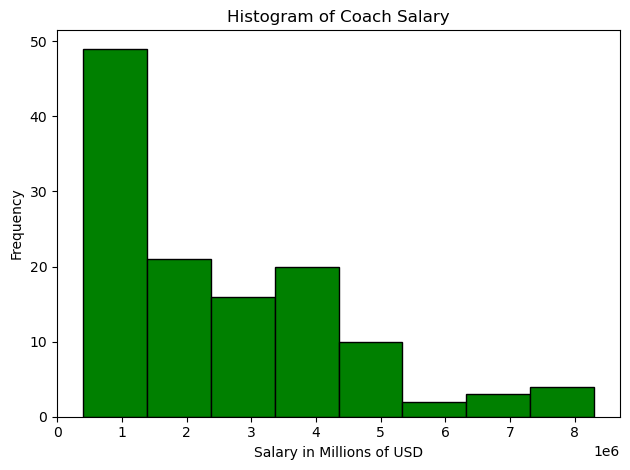

In [41]:
#Creating histogram of coach salary

coaches_df['TotalPay'].plot(kind='hist', color='green', edgecolor='black', bins=8)
plt.title('Histogram of Coach Salary')
plt.xlabel('Salary in Millions of USD')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

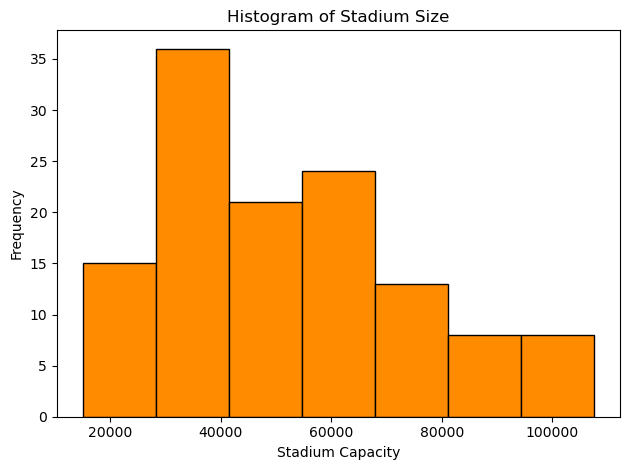

In [42]:
#Creating histogram of stadium sizes

coaches_df['StadiumSize'].plot(kind='hist', color='darkorange', edgecolor='black', bins=7)
plt.title('Histogram of Stadium Size')
plt.xlabel('Stadium Capacity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

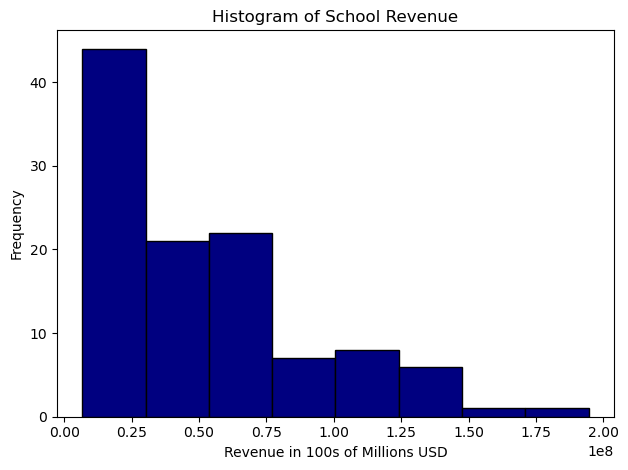

In [43]:
#Creating histogram of school revenue

coaches_df['Revenue'].plot(kind='hist', color='navy', edgecolor='black', bins=8)
plt.title('Histogram of School Revenue')
plt.xlabel('Revenue in 100s of Millions USD')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Average total pay by conference

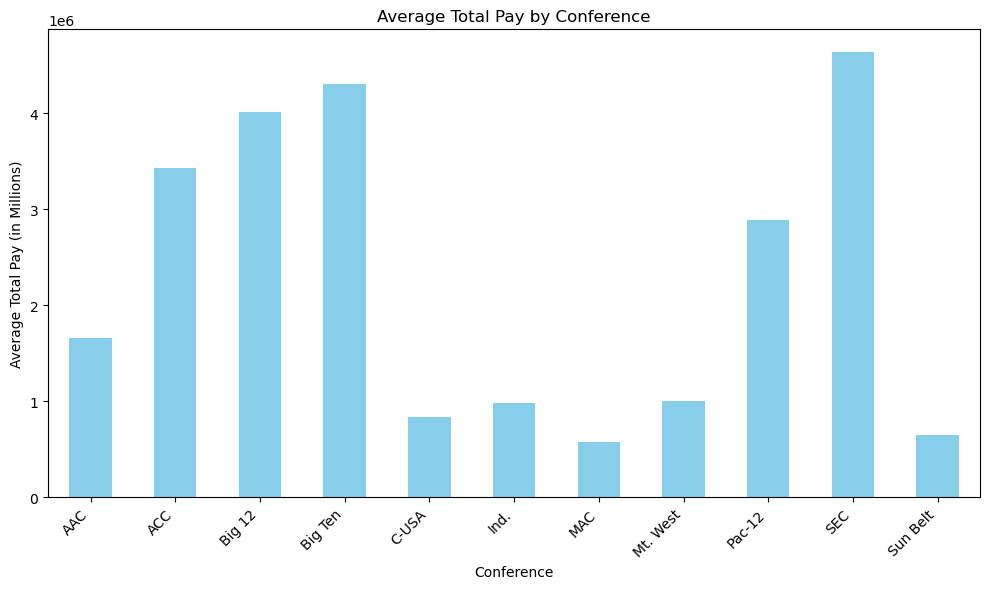

In [44]:
# Group data by 'Conference' and calculate the average TotalPay for each conference
conference_pay = coaches_df.groupby('Conference')['TotalPay'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
conference_pay.plot(kind='bar', color='skyblue')
plt.title('Average Total Pay by Conference')
plt.xlabel('Conference')
plt.ylabel('Average Total Pay (in Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

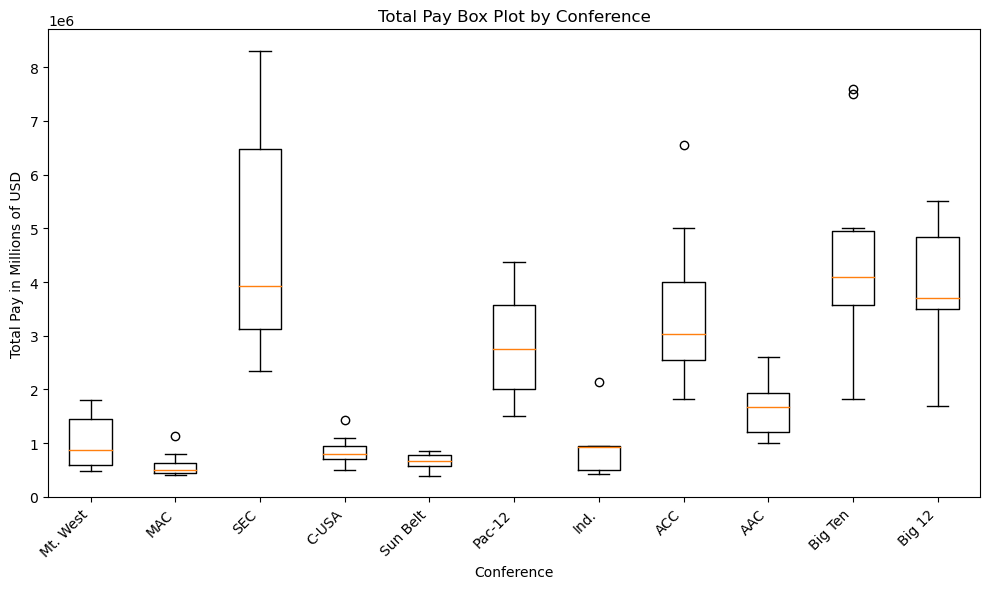

In [45]:
#Creating a box plot to show more detail in the average TotalPay by Conference

plt.figure(figsize=(10, 6))
plt.boxplot([coaches_df[coaches_df['Conference'] == conference]['TotalPay'] for conference in coaches_df['Conference'].unique()])
plt.xticks(range(1, len(coaches_df['Conference'].unique()) + 1), coaches_df['Conference'].unique(), rotation=45, ha='right')
plt.title('Total Pay Box Plot by Conference')
plt.xlabel('Conference')
plt.ylabel('Total Pay in Millions of USD')
plt.tight_layout()
plt.show()

### Total pay by stadium size 

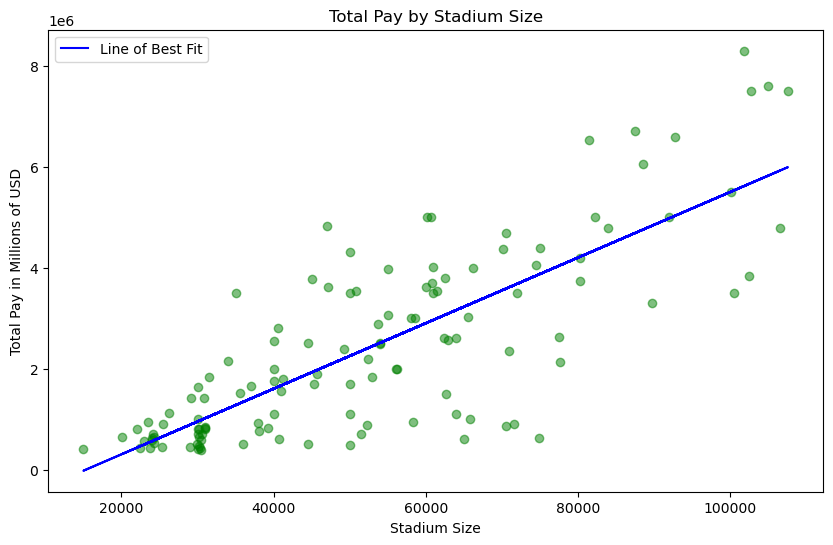

In [46]:
#Total pay by stadium size

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coaches_df['StadiumSize'], coaches_df['TotalPay'], alpha=0.5, color='green')
plt.xlabel('Stadium Size')
plt.ylabel('Total Pay in Millions of USD')
plt.title('Total Pay by Stadium Size')
x = coaches_df['StadiumSize']
y = coaches_df['TotalPay']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='blue', label='Line of Best Fit')
plt.legend()
plt.show()

### Total pay by GSR

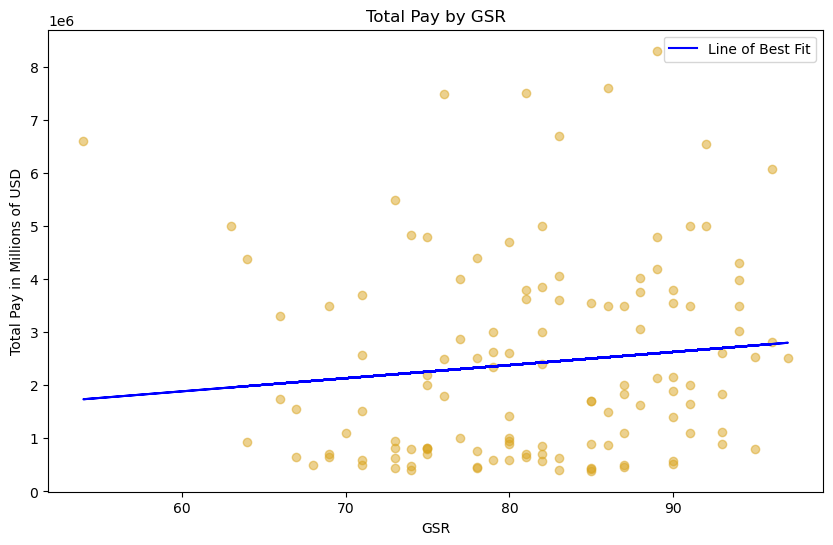

In [47]:
#Total pay by GSR

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coaches_df['GSR'], coaches_df['TotalPay'], alpha=0.5, color='goldenrod')
plt.xlabel('GSR')
plt.ylabel('Total Pay in Millions of USD')
plt.title('Total Pay by GSR')
x = coaches_df['GSR']
y = coaches_df['TotalPay']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='blue', label='Line of Best Fit')
plt.legend()
plt.show()

In [48]:
#Total pay by FGR

# Creating a scatter plot
#plt.figure(figsize=(10, 6))
#plt.scatter(coaches_df['GSR'], coaches_df['TotalPay'], alpha=0.5, color='goldenrod')
#plt.xlabel('GSR')
#plt.ylabel('Total Pay in Millions of USD')
#plt.title('Total Pay by GSR')
#x = coaches_df['FGR']
#y = coaches_df['TotalPay']
#coefficients = np.polyfit(x, y, 1)
#polynomial = np.poly1d(coefficients)
#plt.plot(x, polynomial(x), color='blue', label='Line of Best Fit')
#plt.legend()
#plt.show()

### Total pay by Revenue 

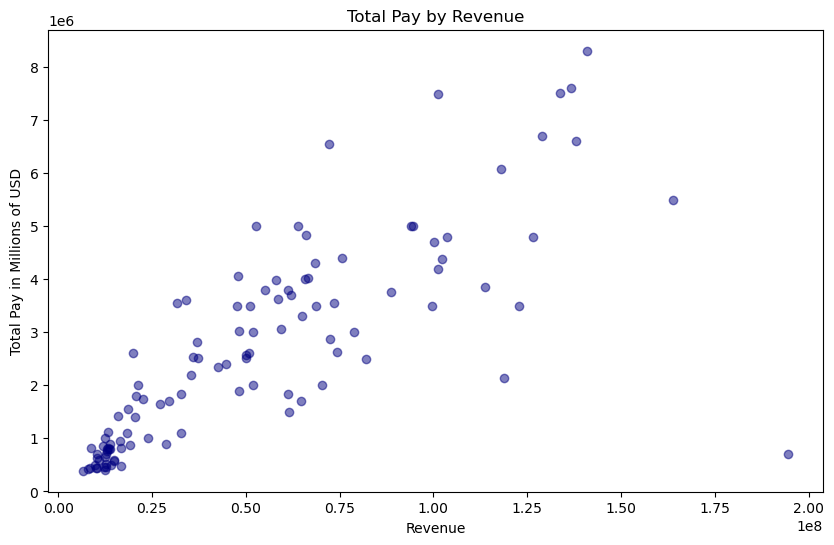

In [49]:
#Total pay by revenue

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coaches_df['Revenue'], coaches_df['TotalPay'], alpha=0.5, color='navy')
plt.xlabel('Revenue')
plt.ylabel('Total Pay in Millions of USD')
plt.title('Total Pay by Revenue')
plt.show()

### Total pay by Wins 

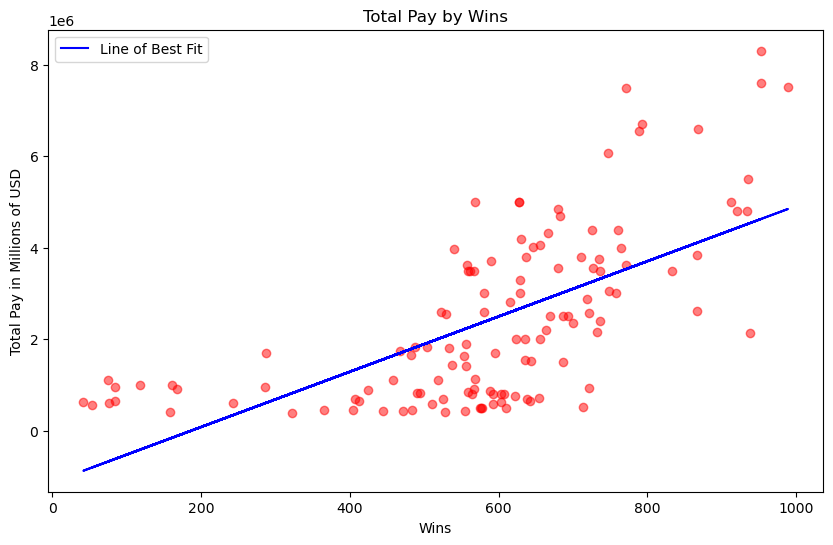

In [50]:
#Total pay by wins

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coaches_df['Wins'], coaches_df['TotalPay'], alpha=0.5, color='red')
plt.xlabel('Wins')
plt.ylabel('Total Pay in Millions of USD')
plt.title('Total Pay by Wins')
x = coaches_df['Wins']
y = coaches_df['TotalPay']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='blue', label='Line of Best Fit')
plt.legend()
plt.show()

### Total pay by Losses 

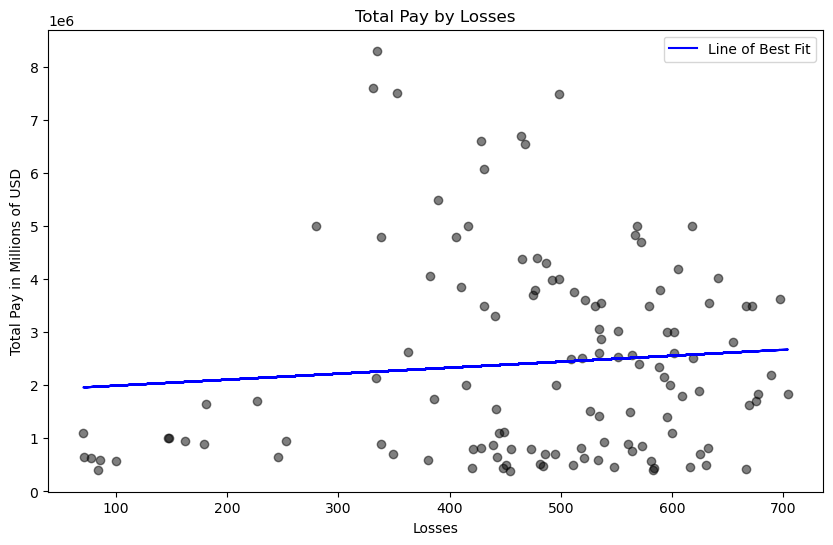

In [51]:
#Total pay by losses

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coaches_df['Losses'], coaches_df['TotalPay'], alpha=0.5, color='black')
plt.xlabel('Losses')
plt.ylabel('Total Pay in Millions of USD')
plt.title('Total Pay by Losses')
x = coaches_df['Losses']
y = coaches_df['TotalPay']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), color='blue', label='Line of Best Fit')
plt.legend()
plt.show()

## Data Modeling 

In [52]:
#Dropping any NA values to not mess with the validity of the model

coaches_df.dropna(inplace=True)
coaches_df = coaches_df.reset_index(drop=True)

In [53]:
#Defining predictor and response variables
#The X variables have been narrowed down to only those that have a significant effect on key values

X = coaches_df[['Buyout', 'StadiumSize', 'Revenue', 'Wins']]
y = coaches_df['TotalPay']

In [54]:
#Creating test and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#Creating model
model = LinearRegression()

#Training model
model.fit(X_train, y_train)

LinearRegression()

In [56]:
#Finding the MSE and R-Squared values

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 561394329365.90
R-squared: 0.85


In [57]:
#Adjusted R-squared value

n = len(y_test)
k = X_test.shape[1]

# Calculate the regular R-squared
r2 = r2_score(y_test, y_pred)

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print(f"Adjusted R-squared: {adjusted_r2:.2f}")


Adjusted R-squared: 0.80


### Using SHAP to visualize predictor variable importance 

In [58]:
#Creating SHAP explainer model

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

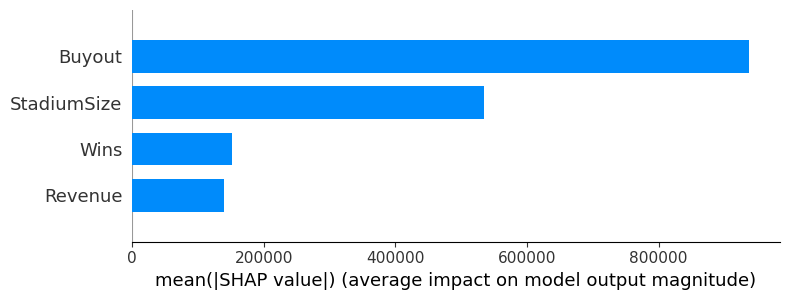

In [59]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

### Finding projected Syracuse coach salary 

In [60]:
#Finding recommended Syracuse coach salary

syracuse_data = {
    'Buyout': [10000000],
    'StadiumSize': [49250],
    'Revenue': [44613716],
    'Wins': [737],  
}

# Converting dictionary into data frame
syracuse_df = pd.DataFrame(syracuse_data)

# Making recommendation
predicted_salary_syracuse = model.predict(syracuse_df)

print(f"Recommended Salary for Syracuse: ${predicted_salary_syracuse[0]:,.2f}")


Recommended Salary for Syracuse: $2,689,767.20


### Syracuse coach salary if they were in the Big East 

In [61]:
#Finding out the mean salary of coaches in the ACC (Syracuse is currently in this conference)

acc_coaches = coaches_df[coaches_df['Conference'] == 'ACC']

acc_coaches

acc_coaches['TotalPay'].mean()

3638751.0

In [62]:
#Finding out the mean salary of coaches in the Big East (now called the AAC)

big_east_coaches = coaches_df[coaches_df['Conference'] == 'AAC']

big_east_coaches

big_east_coaches['TotalPay'].mean()

1592083.3333333333

In [63]:
#Finding out the mean salary of coaches in the Big Ten

big_ten_coaches = coaches_df[coaches_df['Conference'] == 'Big Ten']

big_ten_coaches

big_ten_coaches['TotalPay'].mean()

4353310.636363637

In [64]:
#Coach salary is on average %56.25 smaller in the AAC than the ACC, using this percentage we can calculate what the \
#Syracuse football coaches salary would be if they were in the AAC.

syr_coach_salary = coaches_df.iloc[65, 4]

print(f"Predicted Salary for Syracuse in the Big East: ${syr_coach_salary * 0.5625:,.2f}")

Predicted Salary for Syracuse in the Big East: $1,350,678.38


In [65]:
#Coach salary is on averag %19.66 bigger in the Big Ten than the AAC, using this percentage we can calculate what the \
#Syracuse football coaches salary would be if they were in the Big Ten
 

increase_percent = 19.66
increased_salary = syr_coach_salary * (1 + increase_percent / 100)
print(f"Predicted Salary for Syracuse in the Big Ten: ${increased_salary:,.2f}")


Predicted Salary for Syracuse in the Big Ten: $2,873,283.10


## Data Set Display 

In [66]:
#This box is for changing the pandas data frame options to either display all rows or just the head and tail.
### REMEMBER TO RESET AFTER EXPANDING TO MAX ROWS ###

# Set display options to show max rows
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#coaches_df

# Revert display options back to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
coaches_df

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,StadiumSize,GSR,FGR,Revenue,Wins,Losses,Latitude,Longitude
0,Akron,MAC,Terry Bowden,411000,412500,225000.0,50000.0,0,688500.0,30000,74,76.0,12354872.0,528,583,41.072570,-81.508384
1,Alabama,SEC,Nick Saban,8307000,8307000,1100000.0,500000.0,0,33600000.0,101821,89,66.0,140831439.0,953,335,33.207490,-87.550392
2,Appalachian State,Sun Belt,Scott Satterfield,712500,712500,295000.0,145000.0,0,2160417.0,24150,81,57.0,194500000.0,655,349,36.211515,-81.685506
3,Arkansas State,Sun Belt,Blake Anderson,825000,825000,185000.0,25000.0,0,300000.0,30964,75,52.0,8593341.0,490,518,35.848990,-90.667695
4,Auburn,SEC,Gus Malzahn,6700000,6705656,1400000.0,375000.0,0,32143750.0,87451,83,65.0,128960499.0,793,464,32.602362,-85.488911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Washington State,Pac-12,Mike Leach,3500000,3500000,725000.0,75000.0,0,4900000.0,35117,86,57.0,51125157.0,567,579,46.731968,-117.160586
76,West Virginia,Big 12,Dana Holgorsen,3605000,3617500,1000000.0,90000.0,0,7150000.0,60000,83,53.0,34050353.0,772,522,39.652220,-79.955175
77,Western Kentucky,C-USA,Mike Sanford Jr.,800000,805850,400000.0,0.0,0,1200000.0,22113,75,65.0,13764592.0,607,421,36.984877,-86.459014
78,Western Michigan,MAC,Tim Lester,800000,800000,346500.0,39250.0,0,800000.0,30200,74,40.0,12863908.0,593,473,42.285755,-85.601004
